In [7]:
!yt-dlp --no-audio -f "bestvideo[ext=mp4]" -o "input/selective_attention_test.mp4" "https://www.youtube.com/watch?v=vJG698U2Mvo"

[youtube] Extracting URL: https://www.youtube.com/watch?v=vJG698U2Mvo
[youtube] vJG698U2Mvo: Downloading webpage
[youtube] vJG698U2Mvo: Downloading ios player API JSON
[youtube] vJG698U2Mvo: Downloading mweb player API JSON
[youtube] vJG698U2Mvo: Downloading m3u8 information
[info] vJG698U2Mvo: Downloading 1 format(s): 397
[download] Destination: input/selective_attention_test.mp4
[download] 100% of    2.63MiB in 00:00:00 at 6.81MiB/s0;33m00:000m


In [8]:
# Import display function
from IPython.display import Image, display
from pathlib import Path

# Import providers
from mirk.providers_cv import YOLOProvider
from mirk.providers_vlm import OpenAIVLMProvider

In [9]:
# Initialize CV provider
cv_yolo = YOLOProvider()

# Detect person in video
result = cv_yolo.detect_until_object(
    source="input/selective_attention_test.mp4",
    target_class="person",  # Target class to detect
    conf_threshold=0.8,  # Confidence threshold
)

if result:
    frame_num, confidence = result
    print(f"Found person in frame {frame_num} with confidence {confidence:.2f}")
    # Create output directory if it doesn't exist
    output_dir = Path("output")
    output_dir.mkdir(parents=True, exist_ok=True)
    # Save the detected frame
    cv_yolo.save_frame(
        "input/selective_attention_test.mp4",
        frame_num,
        f"output/detected_person_frame_0.jpg",
    )
else:
    print("Target object not found in video")


video 1/1 (frame 1/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 185.6ms
video 1/1 (frame 2/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 150.5ms
video 1/1 (frame 3/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 149.4ms
video 1/1 (frame 4/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 150.4ms
video 1/1 (frame 5/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 147.9ms
video 1/1 (frame 6/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 153.8ms
video 1/1 (frame 7/2447) /Users/dimatimofeev/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 428.6ms
video 1/1 (frame 8/2447) /Users/dimatimo

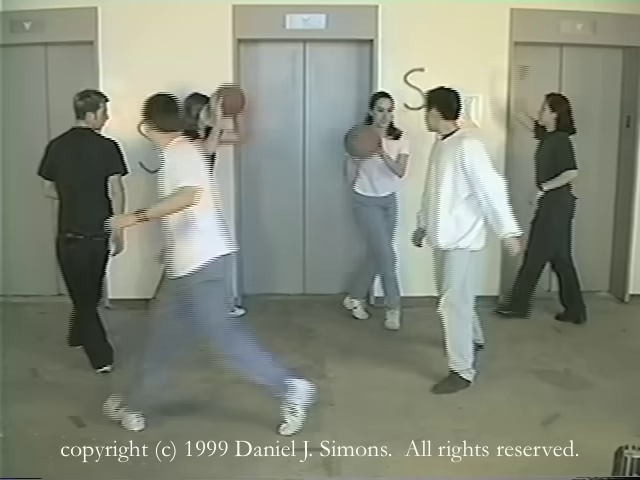

In [10]:
# Display image from file
display(Image(f"output/detected_person_frame_0.jpg"))

In [28]:
# Initialize VLM provider
vlm_openai = OpenAIVLMProvider(model="gpt-4o")

# Question to ask about the image
question = "What are the people doing in the image?"
# Ask about the saved frame
answer = vlm_openai.ask_about_image("output/detected_person_frame_0.jpg", question)
print(f"\nQuestion: {question}")
print(f"Answer: {answer}")


Question: What are the people doing in the image?
Answer: The people in the image appear to be playing with basketballs, likely passing them to one another. There are several individuals in the scene, and some are in motion, possibly participating in an interactive activity or experiment.
